In [ ]:
pip install simpful

example_tip_mamdani.py

In [ ]:
from simpful import *

# A simple fuzzy inference system for the tipping problem
# Create a fuzzy system object
FS = FuzzySystem()

# Define fuzzy sets and linguistic variables
S_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=5), term="poor")
S_2 = FuzzySet(function=Triangular_MF(a=2, b=5, c=8), term="average")
S_3 = FuzzySet(function=Triangular_MF(a=5, b=10, c=10), term="excellent")
FS.add_linguistic_variable("Service", LinguisticVariable([S_1, S_2, S_3], concept="Service quality", universe_of_discourse=[0,10]))

F_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=5), term="bad")
F_2 = FuzzySet(function=Triangular_MF(a=2, b=5, c=8), term="good")
F_3 = FuzzySet(function=Triangular_MF(a=5, b=10, c=10), term="great")
FS.add_linguistic_variable("Food", LinguisticVariable([F_1, F_2, F_3], concept="Food quality", universe_of_discourse=[0,10]))

# Define output fuzzy sets and linguistic variable
T_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=15), term="low")
T_2 = FuzzySet(function=Triangular_MF(a=10, b=15, c=20), term="medium")
T_3 = FuzzySet(function=Triangular_MF(a=15, b=22, c=30), term="high")
FS.add_linguistic_variable("Tip", LinguisticVariable([T_1, T_2, T_3], universe_of_discourse=[0,30]))

# Define fuzzy rules
R1 = "IF (Service IS poor) OR (Food IS bad) THEN (Tip IS low)"
R2 = "IF (Service IS average) AND (Food IS good) THEN (Tip IS medium)"
R3 = "IF (Service IS excellent) OR (Food IS great) THEN (Tip IS high)"
FS.add_rules([R1, R2, R3]) #rule aggregate

# Set antecedents values
FS.set_variable("Service", 7)
FS.set_variable("Food", 8)

# Perform Mamdani inference and print output
print(FS.Mamdani_inference(["Tip"]))

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.12.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 https://github.com/aresio/simpful

{'Tip': 22.37141378423953}


Speed Control example

In [ ]:
from simpful import *

# A simple fuzzy inference system for the tipping problem
# Create a fuzzy system object
FS = FuzzySystem()

# Define fuzzy sets and linguistic variables
T_1 = FuzzySet(function=Trapezoidal_MF(a=0, b=0, c=30, d=50), term="freezing")
T_2 = FuzzySet(function=Triangular_MF(a=30, b=50, c=70), term="cool")
T_3 = FuzzySet(function=Triangular_MF(a=50, b=70, c=90), term="warm")
T_4 = FuzzySet(function=Trapezoidal_MF(a=70, b=90, c=110, d=110), term="hot")
FS.add_linguistic_variable("Temparature", LinguisticVariable([T_1, T_2, T_3, T_4], concept="Temparature", universe_of_discourse=[0,110]))

C_1 = FuzzySet(function=Trapezoidal_MF(a=0, b=0, c=20, d=40), term="sunny")
C_2 = FuzzySet(function=Triangular_MF(a=20, b=50, c=80), term="cloudy")
C_3 = FuzzySet(function=Trapezoidal_MF(a=60, b=80, c=100, d=100), term="overcast")
FS.add_linguistic_variable("Cover", LinguisticVariable([C_1, C_2, C_3], concept="Cover", universe_of_discourse=[0,100]))

# Define output fuzzy sets and linguistic variable
S_1 = FuzzySet(function=Trapezoidal_MF(a=0, b=0, c=25, d=75), term="slow")
S_2 = FuzzySet(function=Trapezoidal_MF(a=25, b=75, c=100, d=100), term="fast")
FS.add_linguistic_variable("Speed", LinguisticVariable([S_1, S_2], universe_of_discourse=[0,100]))

# Define fuzzy rules
R1 = "IF (Cover IS sunny) AND (Temparature IS warm)  THEN (Speed IS fast)"
R2 = "IF (Cover IS cloudy) AND (Temparature IS cool) THEN (Speed IS slow)"
FS.add_rules([R1, R2])

# Set antecedents values
FS.set_variable("Temparature", 65)
FS.set_variable("Cover", 25)

# Perform Mamdani inference and print output
print(FS.Mamdani_inference(["Speed"]))

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.12.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 https://github.com/aresio/simpful

{'Speed': 65.0481505013894}


example_decision_support_system_sepsis.py

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.12.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 https://github.com/aresio/simpful

 * Detected Sugeno model type
{'Sepsis': 68.90324203600152}


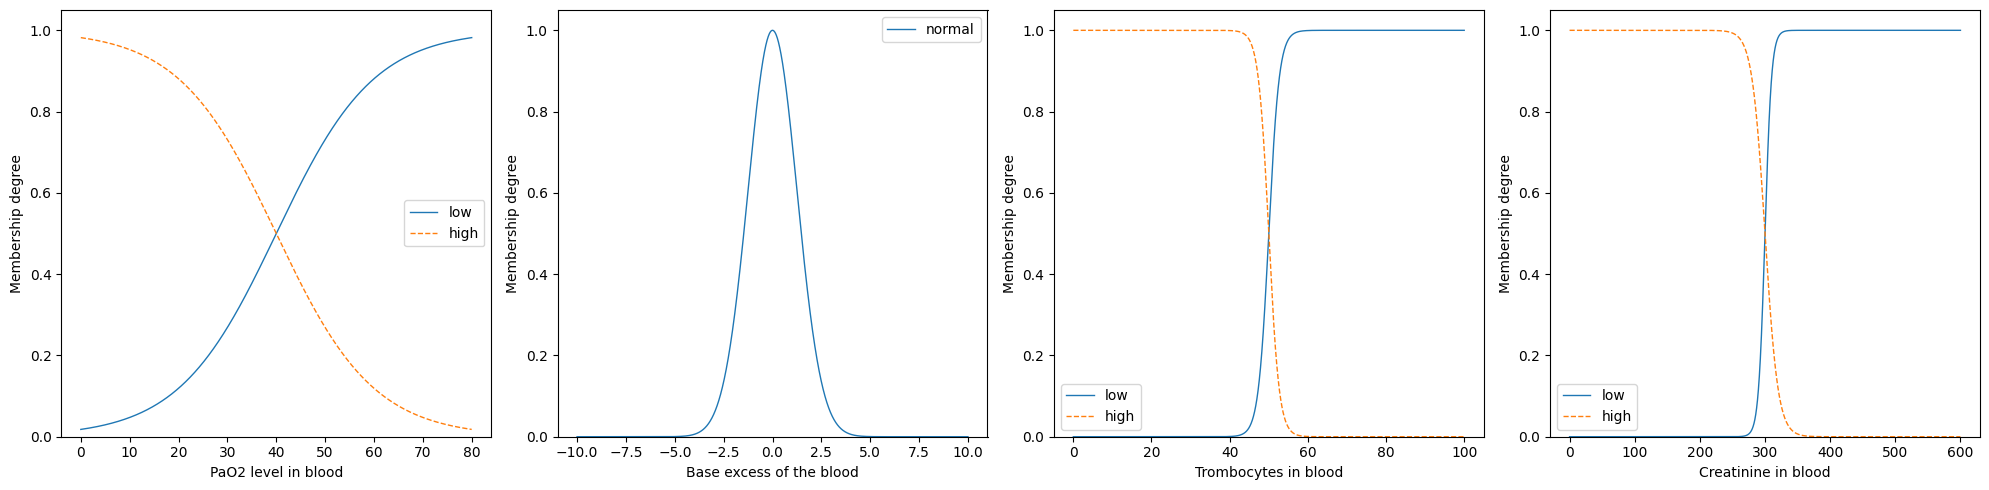

In [ ]:
from simpful import *

# A simple decision support model to diagnose sepsis in the ICU
# Create a fuzzy system object
FS = FuzzySystem()

# Define fuzzy sets for the variable PaO2
P1 = FuzzySet(function=Sigmoid_MF(c=40, a=0.1), term="low")
P2 = FuzzySet(function=InvSigmoid_MF(c=40, a=0.1), term="high")
LV1 = LinguisticVariable([P1,P2], concept="PaO2 level in blood", universe_of_discourse=[0,80])
FS.add_linguistic_variable("PaO2", LV1)

# Define fuzzy sets for the variable base excess
B1 = FuzzySet(function=Gaussian_MF(mu=0,sigma=1.25), term="normal")
LV2 = LinguisticVariable([B1], concept="Base excess of the blood", universe_of_discourse=[-10,10])
FS.add_linguistic_variable("BaseExcess", LV2)

# Define fuzzy sets for the variable trombocytes
T1 = FuzzySet(function=Sigmoid_MF(c=50, a=0.75), term="low")
T2 = FuzzySet(function=InvSigmoid_MF(c=50, a=0.75), term="high")
LV3 = LinguisticVariable([T1,T2], concept="Trombocytes in blood", universe_of_discourse=[0,100])
FS.add_linguistic_variable("Trombocytes", LV3)

# Define fuzzy sets for the variable creatinine
C1 = FuzzySet(function=Sigmoid_MF(c=300, a=0.2), term="low")
C2 = FuzzySet(function=InvSigmoid_MF(c=300, a=0.1), term="high")
LV4 = LinguisticVariable([C1,C2], concept="Creatinine in blood", universe_of_discourse=[0,600])
FS.add_linguistic_variable("Creatinine", LV4)

# Plot all linguistic variables and save them in a output file
FS.produce_figure(outputfile='lvs.pdf')

# Define the consequents
FS.set_crisp_output_value("low_probability", 1)
FS.set_crisp_output_value("high_probability", 99)

# Define the fuzzy rules
RULE1 = "IF (PaO2 IS low) AND (Trombocytes IS high) AND (Creatinine IS high) AND (BaseExcess IS normal) THEN (Sepsis IS low_probability)"
RULE2 = "IF (PaO2 IS high) AND (Trombocytes IS low) AND (Creatinine IS low) AND (NOT(BaseExcess IS normal)) THEN (Sepsis IS high_probability)"

# Add fuzzy rules to the fuzzy reasoner object
FS.add_rules([RULE1, RULE2])

# Set antecedent values
FS.set_variable("PaO2", 50)
FS.set_variable("BaseExcess", -1.5)
FS.set_variable("Trombocytes", 50)
FS.set_variable("Creatinine", 320)

# Perform Sugeno inference and print output
print(FS.Sugeno_inference(["Sepsis"]))

example_tip_sugeno.py

In [ ]:
from simpful import *

# A simple fuzzy inference system for the tipping problem
# Create a fuzzy system object
FS = FuzzySystem()

# Define fuzzy sets and linguistic variables
S_1 = TriangleFuzzySet(a=0, b=0, c=5, term="poor")
S_2 = TriangleFuzzySet(a=2, b=5, c=8, term="avg")
S_3 = TriangleFuzzySet(a=5, b=10, c=10, term="excellent")
FS.add_linguistic_variable("Service", LinguisticVariable([S_1, S_2, S_3], concept="Service quality"))

F_1 = TriangleFuzzySet(a=0, b=0, c=5, term="bad")
F_2 = TriangleFuzzySet(a=2, b=5, c=8, term="good")
F_3 = TriangleFuzzySet(a=5, b=10, c=10, term="great")
FS.add_linguistic_variable("Food", LinguisticVariable([F_1, F_2, F_3], concept="Food quality"))

# Define output crisp values
FS.set_crisp_output_value("low", 5)
FS.set_output_function("medium", "10 + 0.5 * Service + 0.5 * Food")
FS.set_crisp_output_value("high", 15)

# Define function for generous tip (food score + service score + 5%)
#FS.set_output_function("generous", "Food+Service+5")

# Define fuzzy rules
R1 = "IF (Service IS poor) OR (Food IS bad) THEN (Tip IS low)"
R2 = "IF (Service IS avg) AND (Food IS good) THEN (Tip IS medium)"
R3 = "IF (Service IS excellent) OR (Food IS good) THEN (Tip IS high)"
FS.add_rules([R1, R2, R3])

# Set antecedents values
FS.set_variable("Service", 7)
FS.set_variable("Food", 8)

# Perform Sugeno inference and print output
print(FS.Sugeno_inference(["Tip"]))

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.12.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 https://github.com/aresio/simpful

 * Detected Sugeno model type
{'Tip': 15.0}
